In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import datetime


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


# Loading the Dataset

In [4]:
data=pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


there is no duplicates valuse

In [9]:
data.duplicated().sum()

0

data is clean no null values present

In [10]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

## EDA 

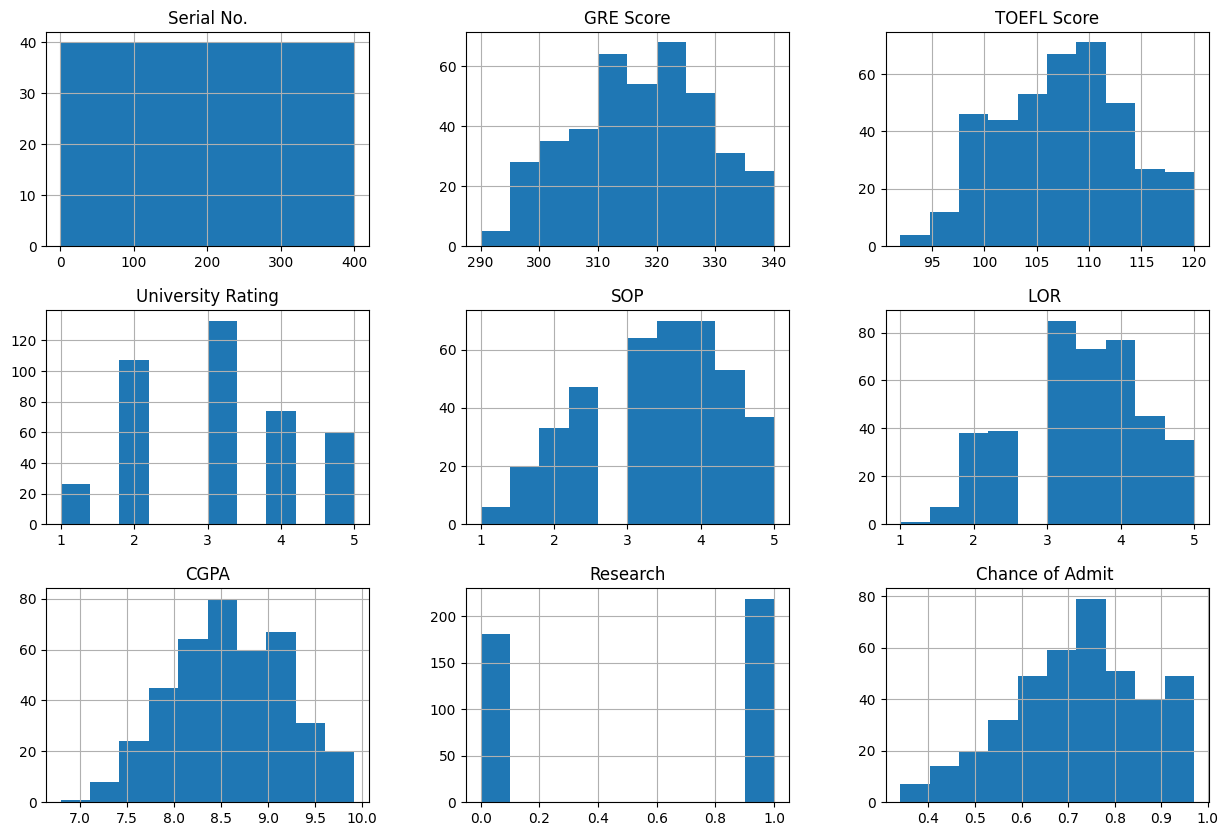

In [13]:
data.hist(figsize=(15,10))
plt.show()


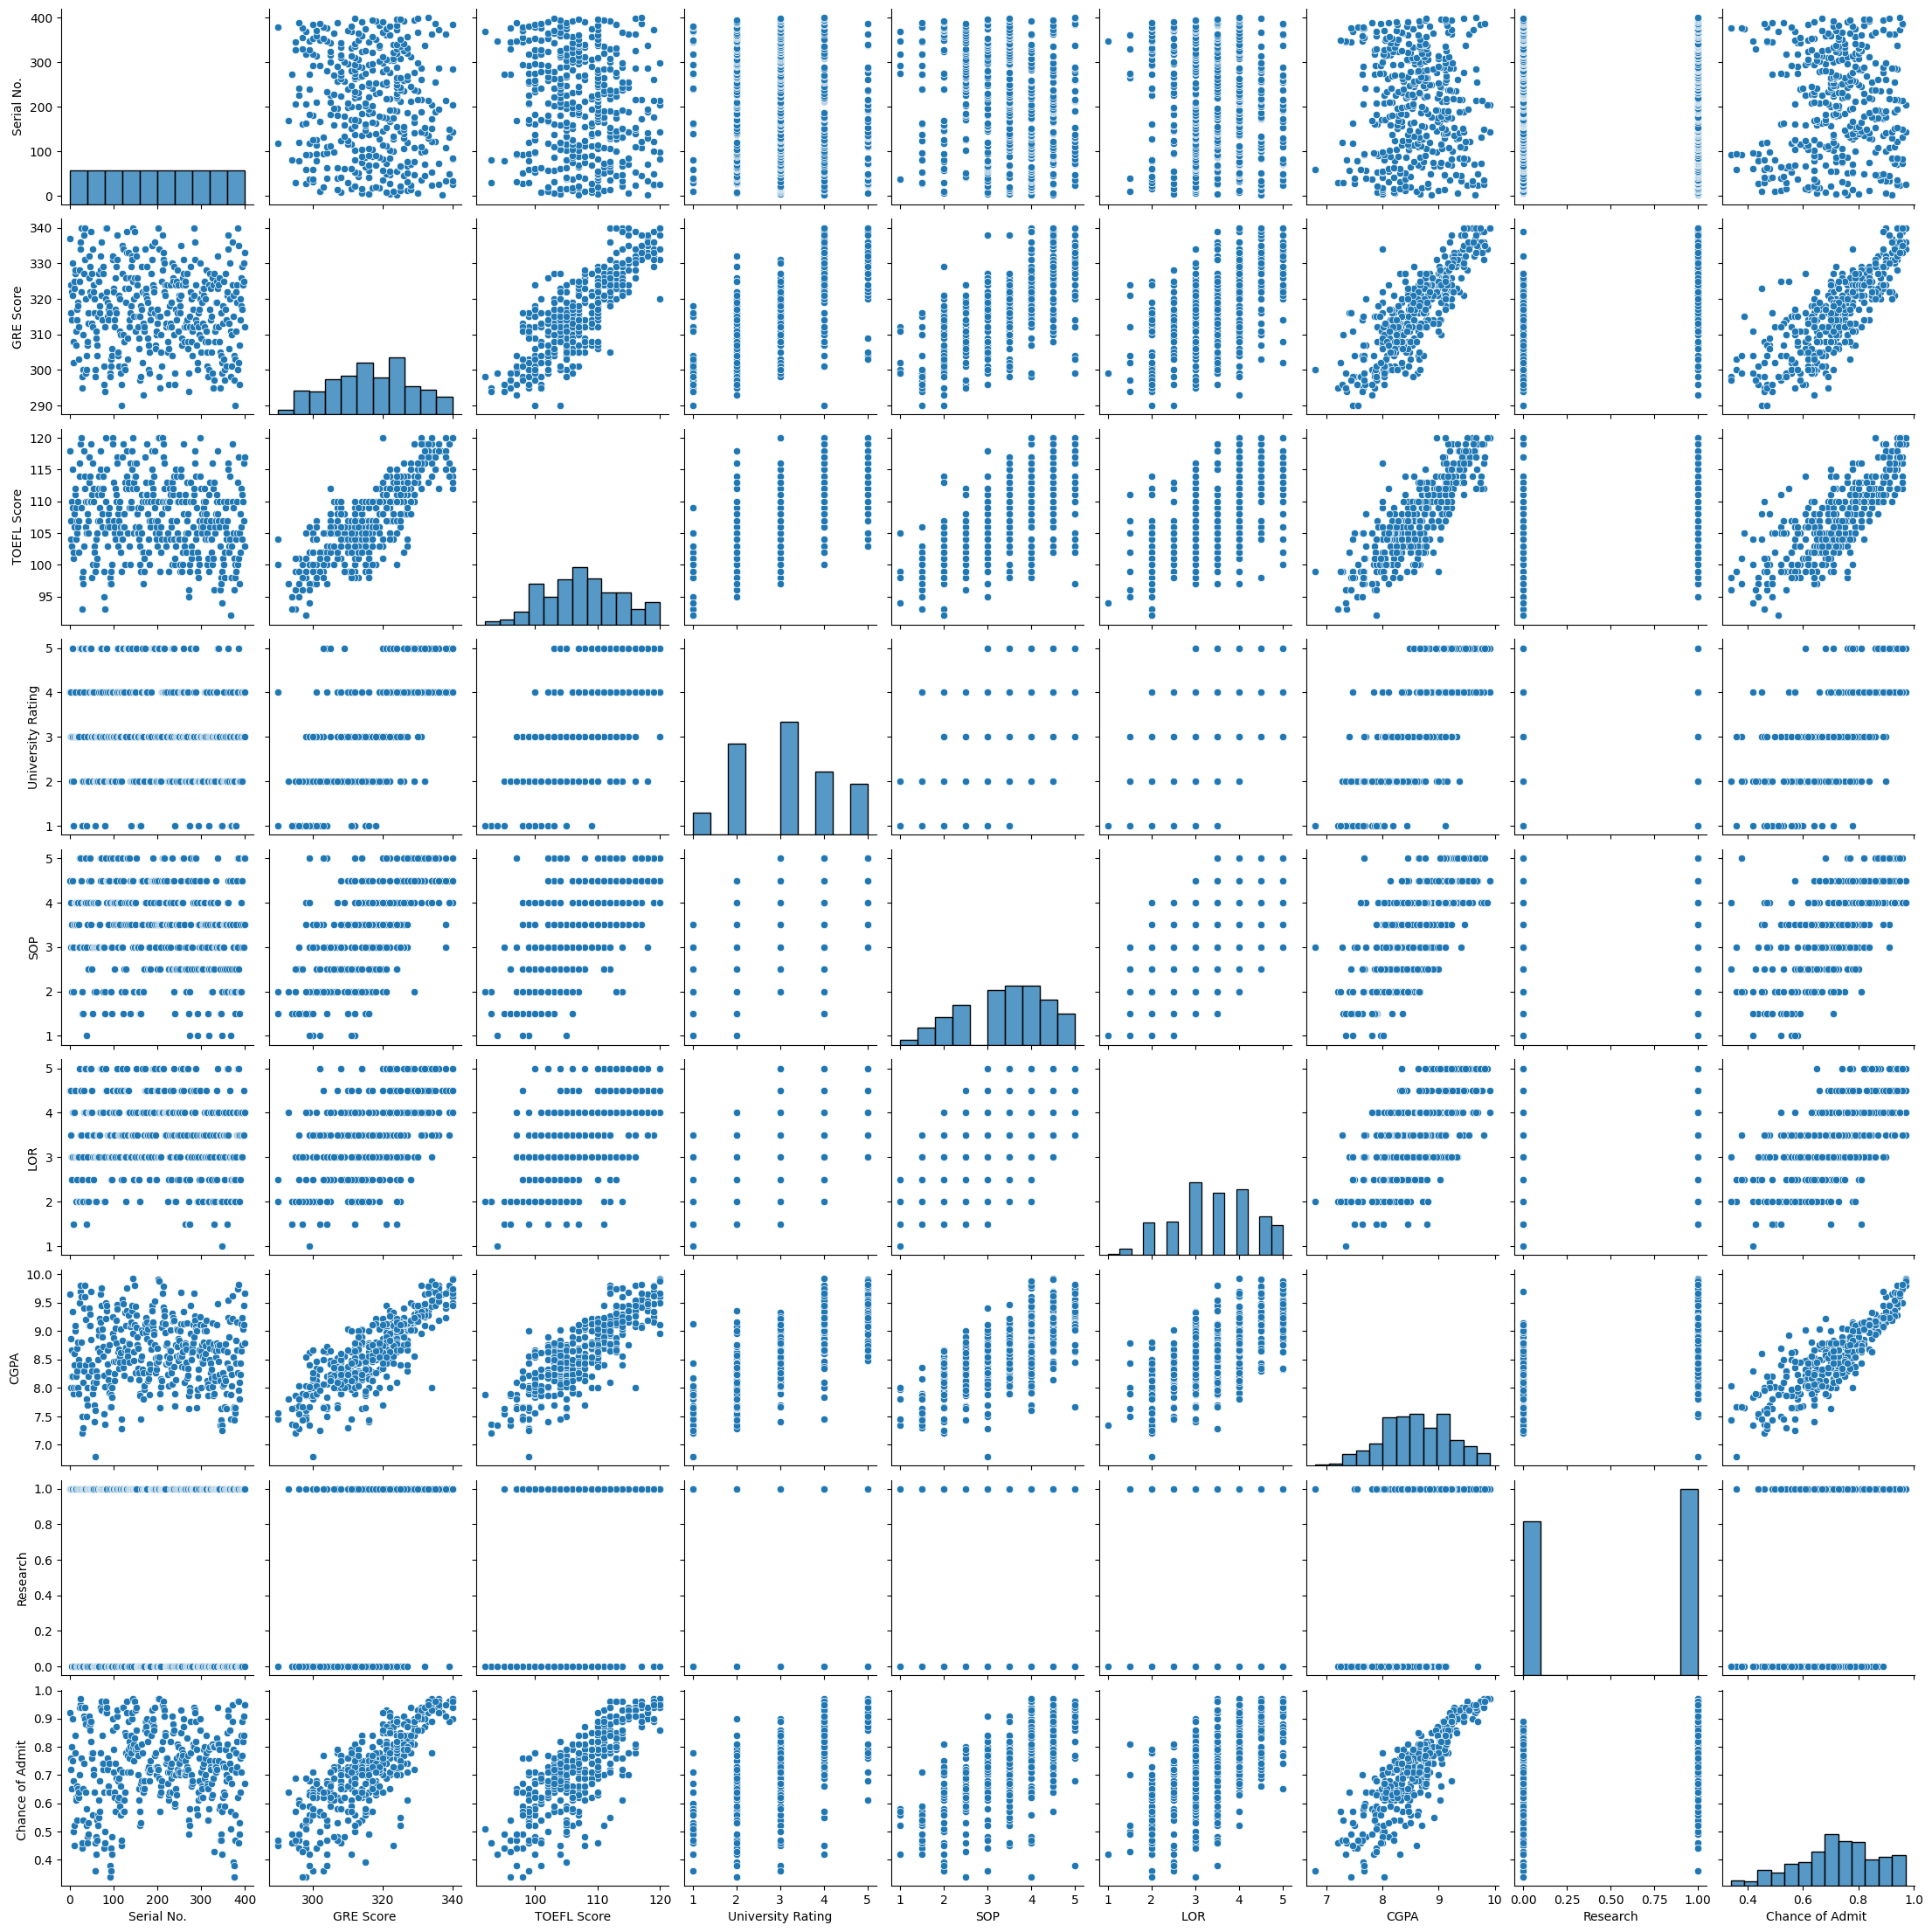

In [14]:
sns.pairplot(data=data)

<AxesSubplot: >

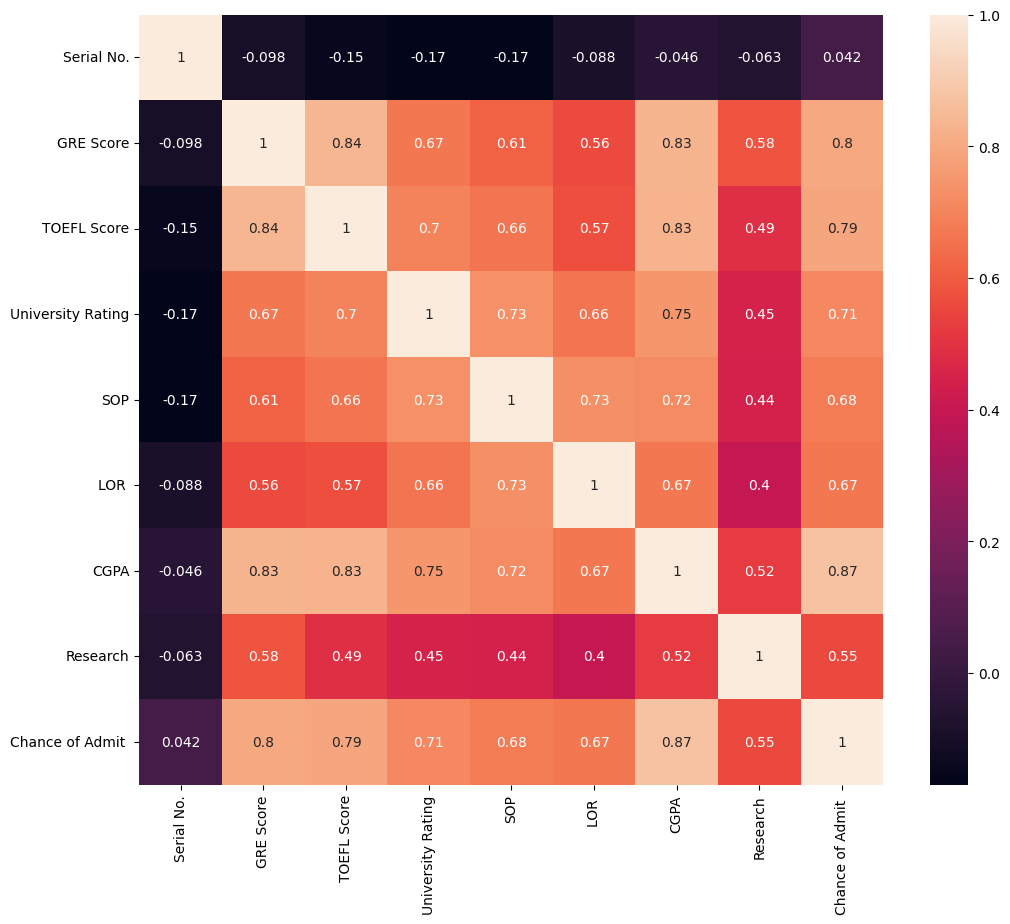

In [15]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True)

SWARM PLOT

swarmplot() Draw a categorical scatterplot with non-overlapping points. A swarm plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

<AxesSubplot: xlabel='University Rating', ylabel='GRE Score'>

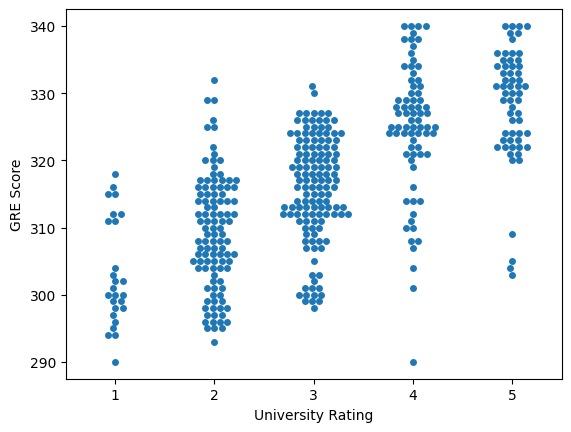

In [16]:
sns.swarmplot(x="University Rating",y="GRE Score",data=data)

RELPLOT

The one we will use most is relplot() . This is a figure-level function for visualizing statistical relationships using two common approaches: scatter plots and line plots. relplot() combines a FacetGrid with one of two axes-level functions: scatterplot() (with kind="scatter" ; the default)

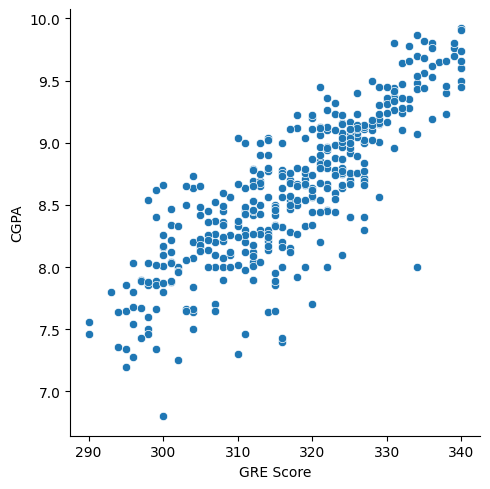

In [17]:
sns.relplot(x="GRE Score",y="CGPA",data=data)

## BOX plot

<AxesSubplot: xlabel='University Rating', ylabel='GRE Score'>

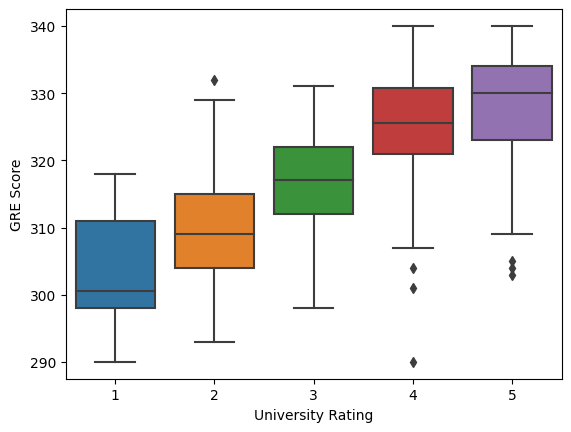

In [18]:
sns.boxplot(x="University Rating",y="GRE Score",data=data)

REGPLOT

This method is used to plot data and a linear regression model fit. ... If strings, these should correspond with column names in “data”. When pandas objects are used, axes will be labeled with the series name. data: This is dataframe where each column is a variable and each row is an observation.

<AxesSubplot: xlabel='TOEFL Score', ylabel='CGPA'>

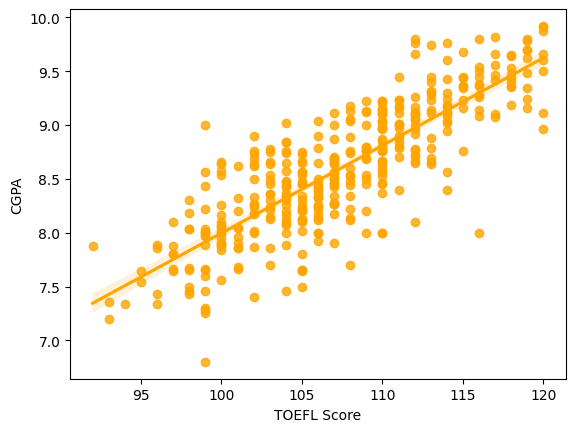

In [19]:
sns.regplot(x="TOEFL Score",y="CGPA",data=data,color='orange')

VIOLIN PLOT

A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared.

<AxesSubplot: xlabel='University Rating', ylabel='GRE Score'>

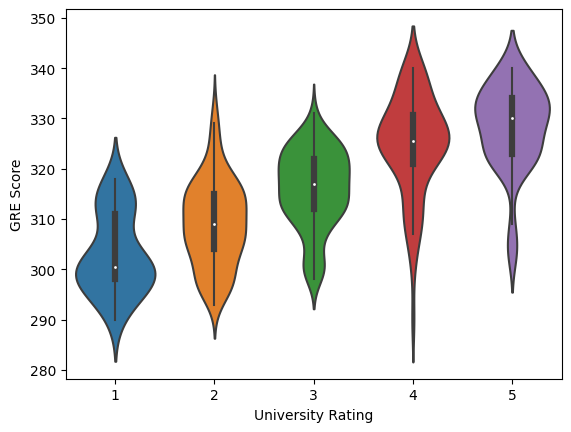

In [20]:
sns.violinplot(x="University Rating",y="GRE Score",data=data)

LINEPLOT

A Line plot can be defined as a graph that displays data as points or check marks above a number line, showing the frequency of each value.

<AxesSubplot: xlabel='CGPA', ylabel='GRE Score'>

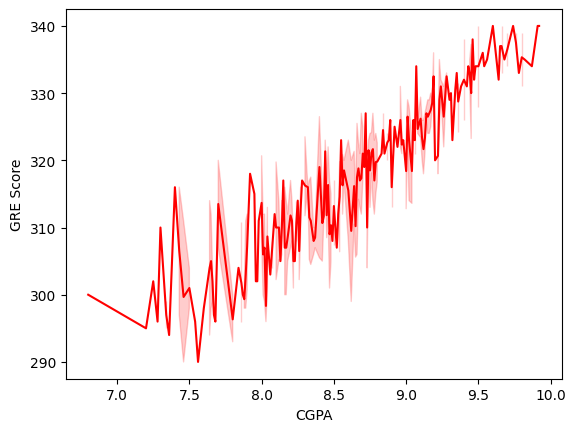

In [22]:
sns.lineplot(x="CGPA",y="GRE Score",data=data,color='red')

JOINTPLOT

Seaborn's jointplot displays a relationship between 2 variables (bivariate) as well as 1D profiles (univariate) in the margins. This plot is a convenience class that wraps JointGrid.

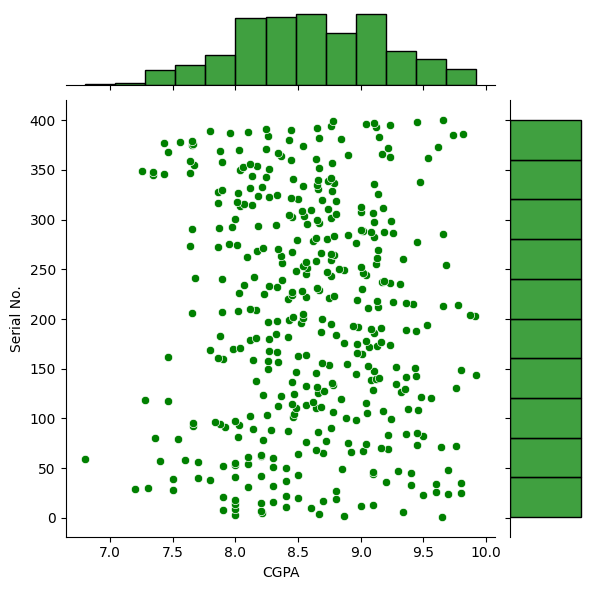

In [23]:
sns.jointplot(x="CGPA",y="Serial No.",data=data,color='g')

<AxesSubplot: xlabel='University Rating', ylabel='CGPA'>

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 7.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


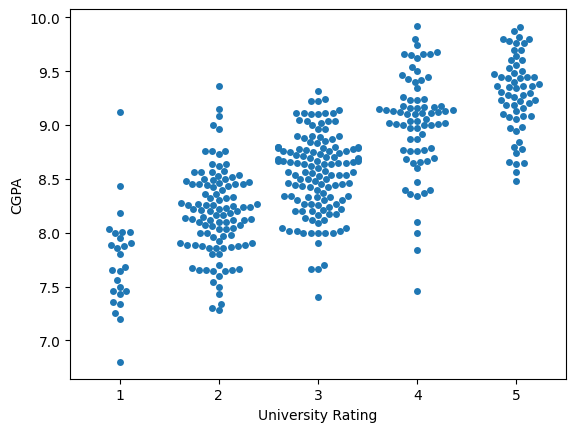

In [24]:
sns.swarmplot(x="University Rating",y="CGPA",data=data)

#### BAR plot

<AxesSubplot: xlabel='University Rating', ylabel='CGPA'>

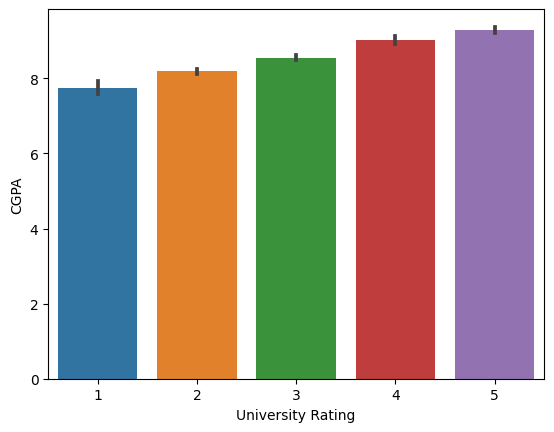

In [25]:
sns.barplot(x="University Rating",y="CGPA",data=data)

##### Train and testing the dataset

In [26]:
x = data.drop('Chance of Admit ',axis=1)
y = data['Chance of Admit ']

In [27]:
from sklearn.linear_model import LassoLars,LinearRegression,LogisticRegression,Ridge,Lasso
from sklearn.metrics import r2_score,accuracy_score
from sklearn.model_selection import train_test_split

In [28]:
# Splitting training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y,
                     test_size = 0.3, random_state = 30)

In [29]:
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [30]:
y_pred = lin_reg.predict(x_test)
 
print(f"r2 Score of test set : {r2_score(y_test, y_pred)}")

r2 Score of test set : 0.8115762697005028


In [31]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mean_squared_error(y_test,y_pred)

0.004315212229416477

## Ridge Regession

In [33]:
rid = Ridge(alpha=1.0)
rid.fit(x_train, y_train)
Ridge()

Ridge()

### RIDGE REGRESSION
Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values to be far away from the actual values.

In [34]:
y_pred = rid.predict(x_test)
 
print(f"r2 Score of test set : {r2_score(y_test, y_pred)}")

r2 Score of test set : 0.810872654848589


### LASSO REGRESSION
Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters).

In [35]:
las = Lasso(alpha=1.0)
las.fit(x_train, y_train)
Lasso()


Lasso()

In [36]:
y_pred = las.predict(x_test)
 
print(f"r2 Score of test set : {r2_score(y_test, y_pred)}")

r2 Score of test set : 0.2054986787374471


### CONCLUSION :
We got a accuracy of about 85 % using Linear Regression and 81 % using Ridge Regression.

The accuracy of other models can be increased by HyperTuning.